In [1]:
import pandas as pd
import numpy as np

In [2]:
life_exp = pd.read_csv('/Users/filipalopes/Ironhack/PROJECTS/Supervised-Learning-Project/gapminder_data/raw_data/life_expectancy_years.csv')

In [3]:
life_exp.head()

,country,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Afghanistan,28.2,28.2,28.2,28.2,28.2,28.2,28.1,28.1,28.1,...,55.7,56.2,56.7,57.2,57.7,57.8,57.9,58.0,58.4,58.7
1,Albania,35.4,35.4,35.4,35.4,35.4,35.4,35.4,35.4,35.4,...,75.9,76.3,76.7,77.0,77.2,77.4,77.6,77.7,77.9,78.0
2,Algeria,28.8,28.8,28.8,28.8,28.8,28.8,28.8,28.8,28.8,...,76.3,76.5,76.7,76.8,77.0,77.1,77.3,77.4,77.6,77.9
3,Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,82.7,82.7,82.6,82.6,82.6,82.6,82.5,82.5,NaN,NaN
4,Angola,27.0,27.0,27.0,27.0,27.0,27.0,27.0,27.0,27.0,...,59.3,60.1,60.9,61.7,62.5,63.3,64.0,64.7,64.9,65.2


In [4]:
life_exp.shape

(187, 220)

In [5]:
#subsetting (2000 till 2010)
years = [str(i) for i in range(2000,2011)]
years.insert(0,'country')
life_sub = life_exp[[*years]]
life_sub.head()

,country,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010
0,Afghanistan,51.6,51.7,52.4,53.0,53.5,53.9,54.1,54.6,55.2,55.7,56.2
1,Albania,74.4,74.5,74.5,74.6,74.7,74.9,75.2,75.4,75.6,75.9,76.3
2,Algeria,73.9,74.1,74.4,74.5,75.1,75.4,75.6,75.9,76.1,76.3,76.5
3,Andorra,81.8,82.0,82.3,82.4,82.3,82.5,82.5,82.7,82.7,82.7,82.7
4,Angola,53.4,53.6,54.5,55.1,55.7,56.5,57.0,57.8,58.6,59.3,60.1


In [6]:
len(life_sub.country.unique()) #187 countries

187

In [7]:
life_melt = life_sub.melt(id_vars=["country"])
life_melt.head()

,country,variable,value
0,Afghanistan,2000,51.6
1,Albania,2000,74.4
2,Algeria,2000,73.9
3,Andorra,2000,81.8
4,Angola,2000,53.4


In [8]:
life_melt.sort_values(by=['country','variable'], inplace=True)
life_melt.head()

,country,variable,value
0,Afghanistan,2000,51.6
187,Afghanistan,2001,51.7
374,Afghanistan,2002,52.4
561,Afghanistan,2003,53.0
748,Afghanistan,2004,53.5


In [9]:
life_expectancy = life_melt.rename(columns={'country':'Country', 'variable':'Year', 'value':'life_expectancy'})
life_expectancy.reset_index(inplace=True)
life_expectancy.drop(columns=['index'], inplace=True)
life_expectancy.head(13) #life expectancy from gapminder.org

,Country,Year,life_expectancy
0,Afghanistan,2000,51.6
1,Afghanistan,2001,51.7
2,Afghanistan,2002,52.4
3,Afghanistan,2003,53.0
4,Afghanistan,2004,53.5
5,Afghanistan,2005,53.9
6,Afghanistan,2006,54.1
7,Afghanistan,2007,54.6
8,Afghanistan,2008,55.2
9,Afghanistan,2009,55.7


In [10]:
life_expectancy.isnull().sum()

Country            0
Year               0
life_expectancy    0
dtype: int64

In [11]:
life_expectancy.shape

(2057, 3)

In [12]:
#life expectancy from WHO
who_all = pd.read_csv('/Users/filipalopes/Ironhack/PROJECTS/Supervised-Learning-Project/Life Expectancy Data.csv') #2000/2015
who_all.head() 

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [13]:
who_all.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

In [14]:
who = who_all[['Country','Year','Life expectancy ','Schooling','Alcohol',' BMI ']]
who.head()

,Country,Year,Life expectancy,Schooling,Alcohol,BMI
0,Afghanistan,2015,65.0,10.1,0.01,19.1
1,Afghanistan,2014,59.9,10.0,0.01,18.6
2,Afghanistan,2013,59.9,9.9,0.01,18.1
3,Afghanistan,2012,59.5,9.8,0.01,17.6
4,Afghanistan,2011,59.2,9.5,0.01,17.2


In [15]:
#subsetting (2000 till 2010)

who_10 = who[(who.Year != 2015)&(who.Year != 2014)&(who.Year != 2013)&(who.Year != 2012)&(who.Year != 2011)]
who_10.sort_values(by=['Country','Year'], inplace=True)
who_10.head(12)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,Country,Year,Life expectancy,Schooling,Alcohol,BMI
15,Afghanistan,2000,54.8,5.5,0.01,12.2
14,Afghanistan,2001,55.3,5.9,0.01,12.6
13,Afghanistan,2002,56.2,6.2,0.01,13.0
12,Afghanistan,2003,56.7,6.5,0.01,13.4
11,Afghanistan,2004,57.0,6.8,0.02,13.8
10,Afghanistan,2005,57.3,7.9,0.02,14.2
9,Afghanistan,2006,57.3,8.1,0.03,14.7
8,Afghanistan,2007,57.5,8.4,0.02,15.2
7,Afghanistan,2008,58.1,8.7,0.03,15.7
6,Afghanistan,2009,58.6,8.9,0.01,16.2


In [16]:
who_10.sort_values(by=['Country','Year'], inplace=True)
who_10.head(25)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Country,Year,Life expectancy,Schooling,Alcohol,BMI
15,Afghanistan,2000,54.8,5.5,0.01,12.2
14,Afghanistan,2001,55.3,5.9,0.01,12.6
13,Afghanistan,2002,56.2,6.2,0.01,13.0
12,Afghanistan,2003,56.7,6.5,0.01,13.4
11,Afghanistan,2004,57.0,6.8,0.02,13.8
10,Afghanistan,2005,57.3,7.9,0.02,14.2
9,Afghanistan,2006,57.3,8.1,0.03,14.7
8,Afghanistan,2007,57.5,8.4,0.02,15.2
7,Afghanistan,2008,58.1,8.7,0.03,15.7
6,Afghanistan,2009,58.6,8.9,0.01,16.2


In [17]:
who_10.shape

(2013, 6)

In [18]:
#dataset from WHO has 193 countries
len(who_10.Country.unique())

183

In [19]:
#dataset from Gapminder has 187 countries
len(life_expectancy.Country.unique())

187

In [20]:
2057 - 2013

44

In [21]:
#I want to loop through list_1(gap) and append to main_list all the elements from list_2(who) that are not found in list_1(gap).

countries_who = who_10.Country.unique() #list_2
countries_gapminder = life_expectancy.Country.unique() #list_1

countries_to_drop = np.setdiff1d(countries_who,countries_gapminder) #Find the set difference of two arrays.

In [22]:
len(countries_to_drop)

25

In [23]:
countries_to_drop #countries to fix

array(['Bolivia (Plurinational State of)', 'Brunei Darussalam',
       'Cabo Verde', 'Congo', 'Czechia', "Côte d'Ivoire",
       "Democratic People's Republic of Korea",
       'Democratic Republic of the Congo', 'Iran (Islamic Republic of)',
       'Kyrgyzstan', "Lao People's Democratic Republic",
       'Micronesia (Federated States of)', 'Republic of Korea',
       'Republic of Moldova', 'Russian Federation', 'Saint Lucia',
       'Saint Vincent and the Grenadines', 'Slovakia',
       'Syrian Arab Republic',
       'The former Yugoslav republic of Macedonia',
       'United Kingdom of Great Britain and Northern Ireland',
       'United Republic of Tanzania', 'United States of America',
       'Venezuela (Bolivarian Republic of)', 'Viet Nam'], dtype=object)

In [24]:
replace_country={'Bolivia (Plurinational State of)':'Bolivia','Brunei Darussalam':'Brunei',
                 'Cabo Verde':'Cape Verde','Congo':'Congo, Rep.',"Côte d'Ivoire":"Cote d'Ivoire",
                 "Democratic People's Republic of Korea":'North Korea','Czechia':'Czech Republic',
                'Democratic Republic of the Congo':'Congo, Dem. Rep.','Iran (Islamic Republic of)':'Iran',
                 'Kyrgyzstan':'Kyrgyz Republic',"Lao People's Democratic Republic":'Lao',
                'Micronesia (Federated States of)':'Micronesia, Fed. Sts.','Republic of Korea':'South Korea',
                 'Republic of Moldova':'Moldova','Russian Federation':'Russia','Saint Lucia':'St. Lucia',
                 'Saint Vincent and the Grenadines':'St. Vincent and the Grenadines','Slovakia':'Slovak Republic',
                 'Syrian Arab Republic':'Syria','The former Yugoslav republic of Macedonia':'Macedonia, FYR',
                 'United Kingdom of Great Britain and Northern Ireland':'United Kingdom',
                 'United Republic of Tanzania':'Tanzania','United States of America':'United States',
                 'Venezuela (Bolivarian Republic of)':'Venezuela','Viet Nam':'Vietnam'}

In [25]:
countries_gapminder

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'Brunei', 'Bulgaria', 'Burkina Faso', 'Burundi', 'Cambodia',
       'Cameroon', 'Canada', 'Cape Verde', 'Central African Republic',
       'Chad', 'Chile', 'China', 'Colombia', 'Comoros',
       'Congo, Dem. Rep.', 'Congo, Rep.', 'Costa Rica', "Cote d'Ivoire",
       'Croatia', 'Cuba', 'Cyprus', 'Czech Republic', 'Denmark',
       'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
       'Ethiopia', 'Fiji', 'Finland', 'France', 'Gabon', 'Gambia',
       'Georgia', 'Germany', 'Ghana', 'Greece', 'Grenada', 'Guatemala',
       'Guinea', 'Guinea-Bissau', 'Guyana', 'Haiti', '

In [26]:
countries_who

array(['Afghanistan', 'Albania', 'Algeria', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bolivia (Plurinational State of)', 'Bosnia and Herzegovina',
       'Botswana', 'Brazil', 'Brunei Darussalam', 'Bulgaria',
       'Burkina Faso', 'Burundi', 'Cabo Verde', 'Cambodia', 'Cameroon',
       'Canada', 'Central African Republic', 'Chad', 'Chile', 'China',
       'Colombia', 'Comoros', 'Congo', 'Costa Rica', 'Croatia', 'Cuba',
       'Cyprus', 'Czechia', "Côte d'Ivoire",
       "Democratic People's Republic of Korea",
       'Democratic Republic of the Congo', 'Denmark', 'Djibouti',
       'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador',
       'Equatorial Guinea', 'Eritrea', 'Estonia', 'Ethiopia', 'Fiji',
       'Finland', 'France', 'Gabon', 'Gambia', 'Georgia', 'Germany',
       'Ghana', 'Greece', 'Grenad

In [27]:
countries_who_replaced = who_10.replace({"Country": replace_country})

In [28]:
len(countries_who_replaced.Country.unique())

183

In [29]:
countries_who_2 = countries_who_replaced.Country.unique() #list_2
countries_gapminder = life_expectancy.Country.unique() #list_1

countries_to_drop2 = np.setdiff1d(countries_who_2,countries_gapminder)

In [30]:
countries_to_drop2

array([], dtype=object)

In [31]:
print(len(countries_who_2))
print(len(countries_gapminder))

183
187


In [32]:
countries_to_drop3 = np.setdiff1d(countries_gapminder, countries_who_2)
countries_to_drop3 #drop these countries from gapminder

array(['Andorra', 'Dominica', 'Marshall Islands', 'Palestine'],
      dtype=object)

In [33]:
life_expect_gap = life_expectancy[(life_expectancy.Country != 'Andorra')&(life_expectancy.Country != 'Dominica')&
                                  (life_expectancy.Country != 'Marshall Islands')&(life_expectancy.Country != 'Palestine')]

life_expect_gap.head()


,Country,Year,life_expectancy
0,Afghanistan,2000,51.6
1,Afghanistan,2001,51.7
2,Afghanistan,2002,52.4
3,Afghanistan,2003,53.0
4,Afghanistan,2004,53.5


In [34]:
life_expect_gap.shape

(2013, 3)

In [35]:
final_countries = list(life_expect_gap.Country.unique())
final_countries

['Afghanistan',
 'Albania',
 'Algeria',
 'Angola',
 'Antigua and Barbuda',
 'Argentina',
 'Armenia',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bhutan',
 'Bolivia',
 'Bosnia and Herzegovina',
 'Botswana',
 'Brazil',
 'Brunei',
 'Bulgaria',
 'Burkina Faso',
 'Burundi',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Cape Verde',
 'Central African Republic',
 'Chad',
 'Chile',
 'China',
 'Colombia',
 'Comoros',
 'Congo, Dem. Rep.',
 'Congo, Rep.',
 'Costa Rica',
 "Cote d'Ivoire",
 'Croatia',
 'Cuba',
 'Cyprus',
 'Czech Republic',
 'Denmark',
 'Djibouti',
 'Dominican Republic',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Equatorial Guinea',
 'Eritrea',
 'Estonia',
 'Ethiopia',
 'Fiji',
 'Finland',
 'France',
 'Gabon',
 'Gambia',
 'Georgia',
 'Germany',
 'Ghana',
 'Greece',
 'Grenada',
 'Guatemala',
 'Guinea',
 'Guinea-Bissau',
 'Guyana',
 'Haiti',
 'Honduras',
 'Hungary',
 'Iceland',
 'India',
 'Indonesia'

In [36]:
life_expect_gap.head()

,Country,Year,life_expectancy
0,Afghanistan,2000,51.6
1,Afghanistan,2001,51.7
2,Afghanistan,2002,52.4
3,Afghanistan,2003,53.0
4,Afghanistan,2004,53.5


In [37]:
life_expect_gap.isnull().sum()

Country            0
Year               0
life_expectancy    0
dtype: int64

In [38]:
#life_expect_gap.to_csv('/Users/filipalopes/Ironhack/PROJECTS/Supervised-Learning-Project/gapminder_data/treated_data/life_expectancy.csv')

In [39]:
countries_who_replaced.head()

,Country,Year,Life expectancy,Schooling,Alcohol,BMI
15,Afghanistan,2000,54.8,5.5,0.01,12.2
14,Afghanistan,2001,55.3,5.9,0.01,12.6
13,Afghanistan,2002,56.2,6.2,0.01,13.0
12,Afghanistan,2003,56.7,6.5,0.01,13.4
11,Afghanistan,2004,57.0,6.8,0.02,13.8


In [40]:
countries_who_replaced.isnull().sum()

Country               0
Year                  0
Life expectancy       0
Schooling           110
Alcohol              12
 BMI                 22
dtype: int64

In [41]:
'''
NaNs in schooling (fill with data from 2005):
- North Korea (11.4)   - http://hdr.undp.org/sites/default/files/Country-Profiles/KOR.pdf
- Cote d'Ivoire (4.8)
- Cook Islands (already drop)
- Congo, Dem. Rep. (4.2)
- Czech Republic (13.3)
- Somalia (2.1) - http://hdr.undp.org/en/indicators/103006# (2006 data only)
- United States (13.2)
- Tanzania (5.6)
- United Kingdom (12.2)   - http://hdr.undp.org/sites/default/files/Country-Profiles/KOR.pdf
- Moldova (9.8)
- South Korea (12.0)
'''
#http://hdr.undp.org/en/content/mean-years-schooling-males-aged-25-years-and-above-years

"\nNaNs in schooling (fill with data from 2005):\n- North Korea (11.4)   - http://hdr.undp.org/sites/default/files/Country-Profiles/KOR.pdf\n- Cote d'Ivoire (4.8)\n- Cook Islands (already drop)\n- Congo, Dem. Rep. (4.2)\n- Czech Republic (13.3)\n- Somalia (2.1) - http://hdr.undp.org/en/indicators/103006# (2006 data only)\n- United States (13.2)\n- Tanzania (5.6)\n- United Kingdom (12.2)   - http://hdr.undp.org/sites/default/files/Country-Profiles/KOR.pdf\n- Moldova (9.8)\n- South Korea (12.0)\n"

In [42]:
#fill NaNs in scholling with the above value

#df[1].fillna(0, inplace=True)
#df1.loc[df1['variable']=='Sales','value'] = df1['value']/1.1

countries_who_replaced.loc[countries_who_replaced['Country']=='North Korea',
                           'Schooling'] = countries_who_replaced['Schooling'].fillna(11.4)

countries_who_replaced.loc[countries_who_replaced['Country']=="Cote d'Ivoire",
                           'Schooling'] = countries_who_replaced['Schooling'].fillna(4.8)

countries_who_replaced.loc[countries_who_replaced['Country']=="Congo, Dem. Rep.",
                           'Schooling'] = countries_who_replaced['Schooling'].fillna(4.2)

countries_who_replaced.loc[countries_who_replaced['Country']=="Czech Republic",
                           'Schooling'] = countries_who_replaced['Schooling'].fillna(13.3)

countries_who_replaced.loc[countries_who_replaced['Country']=="Somalia",
                           'Schooling'] = countries_who_replaced['Schooling'].fillna(2.1)

countries_who_replaced.loc[countries_who_replaced['Country']=="United States",
                           'Schooling'] = countries_who_replaced['Schooling'].fillna(13.2)

countries_who_replaced.loc[countries_who_replaced['Country']=="Tanzania",
                           'Schooling'] = countries_who_replaced['Schooling'].fillna(5.6)

countries_who_replaced.loc[countries_who_replaced['Country']=="United Kingdom",
                           'Schooling'] = countries_who_replaced['Schooling'].fillna(12.2)

countries_who_replaced.loc[countries_who_replaced['Country']=="Moldova",
                           'Schooling'] = countries_who_replaced['Schooling'].fillna(9.8)

countries_who_replaced.loc[countries_who_replaced['Country']=="South Korea",
                           'Schooling'] = countries_who_replaced['Schooling'].fillna(12.0)

In [43]:
countries_who_replaced[countries_who_replaced['Country']=='Tanzania']

,Country,Year,Life expectancy,Schooling,Alcohol,BMI
2793,Tanzania,2000,49.2,5.6,3.89,16.0
2792,Tanzania,2001,49.6,5.6,4.09,16.4
2791,Tanzania,2002,52.0,5.6,3.37,16.8
2790,Tanzania,2003,58.0,5.6,2.34,17.2
2789,Tanzania,2004,51.5,5.6,3.81,17.7
2788,Tanzania,2005,52.2,5.6,3.94,18.1
2787,Tanzania,2006,53.1,5.6,4.07,18.6
2786,Tanzania,2007,54.5,5.6,4.40,19.1
2785,Tanzania,2008,56.2,5.6,3.44,19.6
2784,Tanzania,2009,56.9,5.6,3.97,2.2


In [44]:
countries_who_replaced.Country.unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'Brunei', 'Bulgaria', 'Burkina Faso', 'Burundi', 'Cape Verde',
       'Cambodia', 'Cameroon', 'Canada', 'Central African Republic',
       'Chad', 'Chile', 'China', 'Colombia', 'Comoros', 'Congo, Rep.',
       'Costa Rica', 'Croatia', 'Cuba', 'Cyprus', 'Czech Republic',
       "Cote d'Ivoire", 'North Korea', 'Congo, Dem. Rep.', 'Denmark',
       'Djibouti', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
       'Ethiopia', 'Fiji', 'Finland', 'France', 'Gabon', 'Gambia',
       'Georgia', 'Germany', 'Ghana', 'Greece', 'Grenada', 'Guatemala',
       'Guinea', 'Guinea-Bissau', 'Guyana', 'Haiti', 'Honduras

In [45]:
countries_who_replaced.isnull().sum()

Country              0
Year                 0
Life expectancy      0
Schooling            0
Alcohol             12
 BMI                22
dtype: int64

In [46]:
countries_who_replaced.head()

,Country,Year,Life expectancy,Schooling,Alcohol,BMI
15,Afghanistan,2000,54.8,5.5,0.01,12.2
14,Afghanistan,2001,55.3,5.9,0.01,12.6
13,Afghanistan,2002,56.2,6.2,0.01,13.0
12,Afghanistan,2003,56.7,6.5,0.01,13.4
11,Afghanistan,2004,57.0,6.8,0.02,13.8


In [47]:
#countries_who_replaced.to_csv('/Users/filipalopes/Ironhack/PROJECTS/Supervised-Learning-Project/gapminder_data/treated_data/schooling_alcohol_BMI.csv')

In [48]:
countries_who_replaced.shape #(2013, 6)
life_expect_gap.shape #(2013, 3)

(2013, 3)

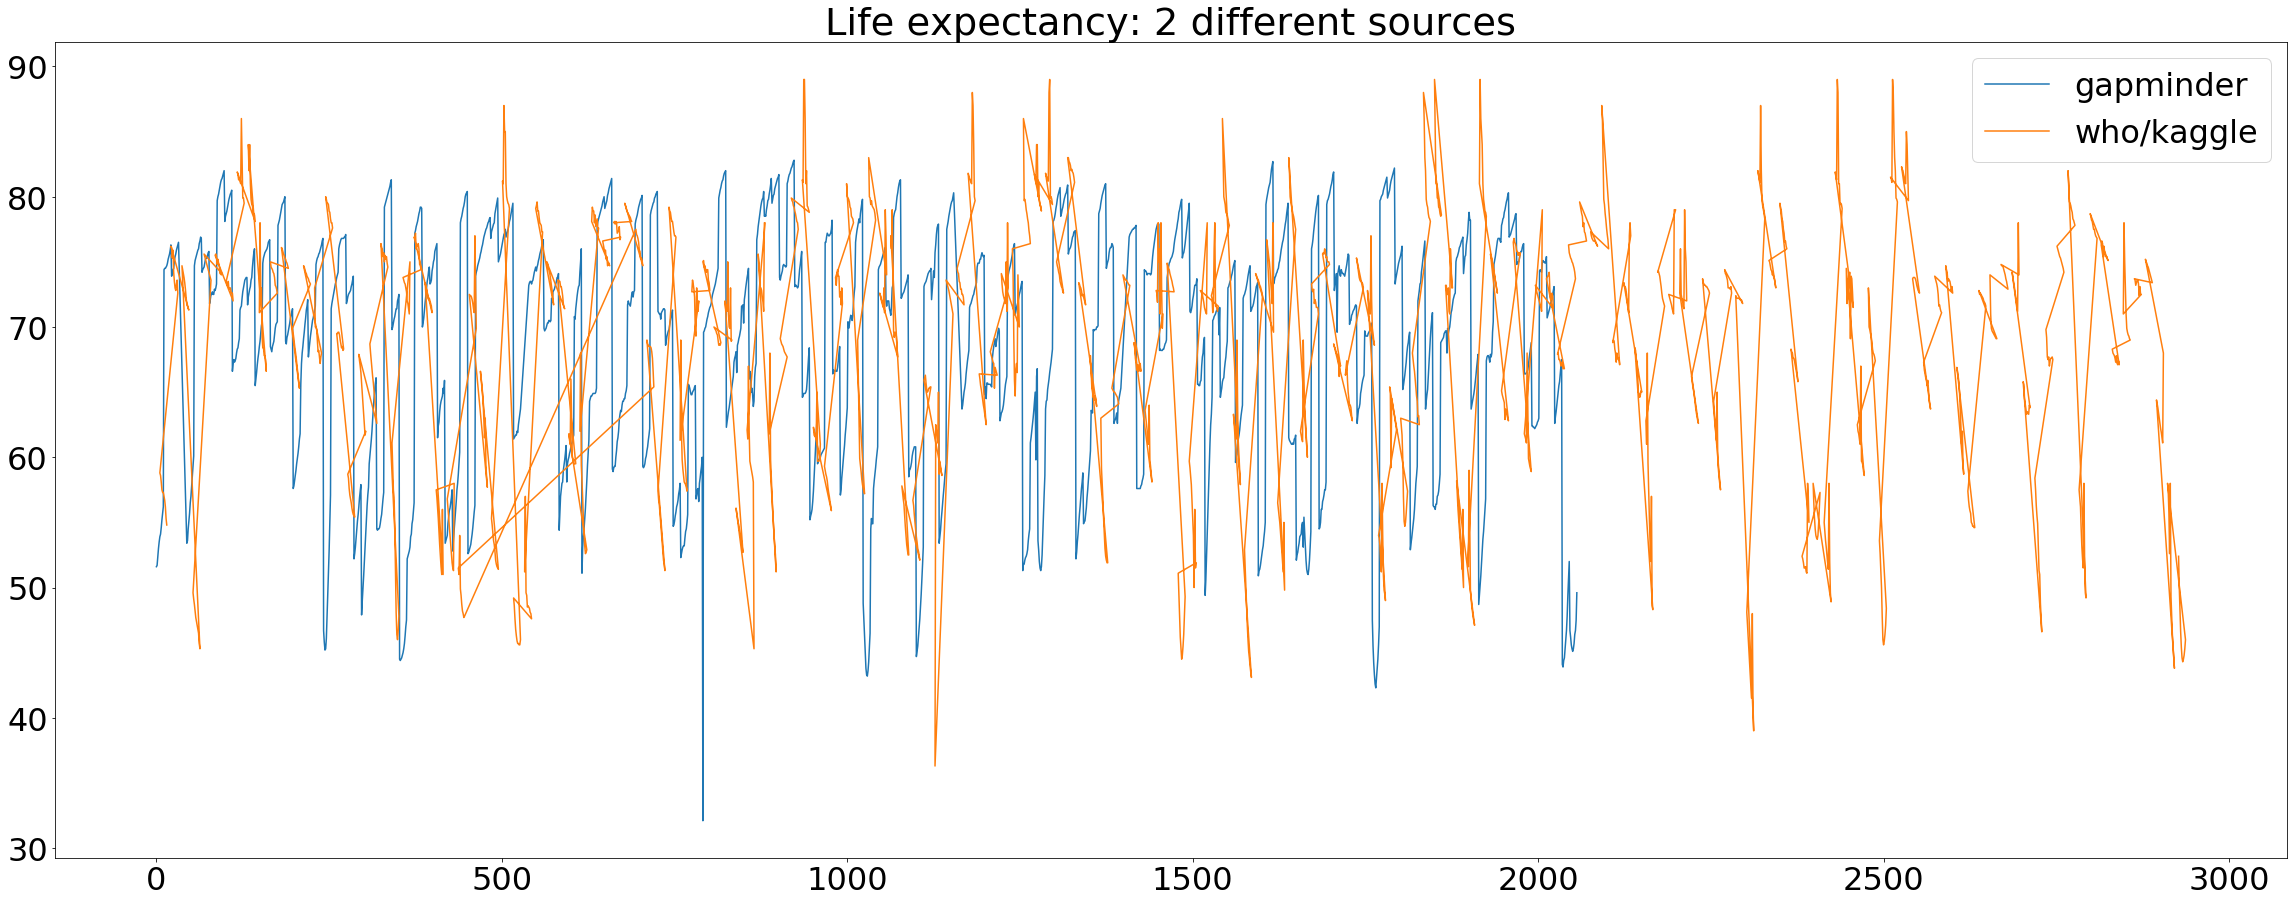

In [55]:
#goodness of fit of life expectancy from both sources (who/kaggle vs. gapminder.org)
import matplotlib.pyplot as plt
import scipy
from scipy import stats

plt.figure(figsize=(40, 15))
plt.rcParams.update({'font.size': 32})

plt.plot(life_expect_gap['life_expectancy'], label = 'gapminder')
plt.plot(countries_who_replaced['Life expectancy '], label = 'who/kaggle')
plt.legend()
plt.title('Life expectancy: 2 different sources')
plt.show()

In [50]:
stats.chisquare(life_expect_gap['life_expectancy'], f_exp=countries_who_replaced['Life expectancy ']) #gives a p-value

Power_divergenceResult(statistic=3858.4187685288985, pvalue=4.6690278520240834e-119)

In [51]:
'''
Null hypothesis: the two distributions are different
Null hypothesis rejected. The distributions are similar
'''

'\nNull hypothesis: the two distributions are different\nNull hypothesis rejected. The distributions are similar\n'

In [52]:
len(life_expect_gap['life_expectancy'])

2013

In [53]:
len(countries_who_replaced['Life expectancy '])

2013